Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
**Name** | Beltran, Adrian David
**Section** | CPE32S3
**Date Performed**: | 21/02/24
**Date Submitted**: | 21/02/24
**Instructor**: | Engr. Richard Roman

<hr>

# Part 1:

In [2]:
#Import the Libraries and Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TitanicTest = '/content/titanic_test.csv'
TitanicTestdf = pd.read_csv(TitanicTest)

TitanicTrain = '/content/titanic_train.csv'
TitanicTraindf = pd.read_csv(TitanicTrain, '\t')

<ipython-input-2-90ea9161e5cf>:10: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  TitanicTraindf = pd.read_csv(TitanicTrain, '\t')


In [3]:
TitanicTestdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


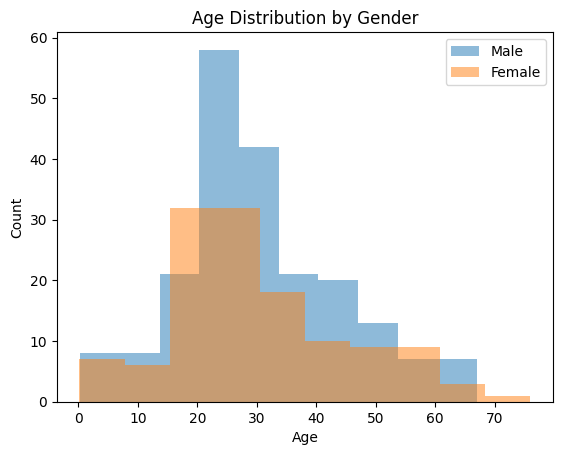

In [4]:
#Plotting the Data
menDf = TitanicTestdf[(TitanicTestdf.Sex == 'male')]
womenDf = TitanicTestdf[(TitanicTestdf.Sex == 'female')]

plt.hist(menDf['Age'], alpha=0.5, label='Male')
plt.hist(womenDf['Age'], alpha=0.5, label='Female')
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Gender')
plt.show()

In [12]:
# Perform Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

data = pd.read_csv('/content/titanic_train.csv')

# Preparing the data
X = data['Age'].values.reshape(-1, 1)
y = data['Fare'].values

# Fixing the missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)

msError = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", msError)

Mean Squared Error:  1524.8312803377087


# Part 2: Perform Decision Tree

## Part 1: Create a Decision Tree Classifier

Question:  
With the data above, what kinds of questions can we ask about the factors that contributed to passengers surviving or perishing in the Titanic disaster?

**Answer:**  


*   Where was the passenger from
*   Most likely, where in the ship did the passenger die?



#### Step 1: Create the dataframe

In [18]:
# a. Import pandas and the csv file
#Code cell 1
#import pandas
import pandas as pd
#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("/content/titanic_train.csv")

In [19]:
# b. Verify the import and take a look at the data
#Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Question:  
Are there missing values in the data set?

Answer:  
Yes, there are missing values in the age, cabin, and embarked columns.

In [15]:
#Code cell 3
#view the first few rows of the data
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Step 2: Prepare the Data for the Decision Tree Model

In [20]:
# a. Replace string data with numeric labels
#code cell 4
training["Sex"] = training["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [21]:
# b. Verify that the Gender variable has been changed
#code cell 5
#view the first few rows of the data again
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# c. Address Missing Values in the Dataset
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)

In [23]:
# d. Verify that the values have been replaced.
#code cell 7
ageColumn = training["Age"].isna().sum()
print("There are " + str(ageColumn) + " number of missing values in the 'Age' column.")

There are 0 number of missing values in the 'Age' column.


In [24]:
training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,C


Question:  
What is the value that was used to replace the missing ages?

Answer:  
Because there are no missing values in the ages columns, no value was used to replace anything.

#### Step 3: Train and Score the Decision Tree

In [25]:
# a. Create an array object with the variable that will be the target for the model

#code cell 8
#create the array for the target values
y_target = training["Survived"].values

In [27]:
# b. Create an array of the values that will be the input for the model.
#code cell 9
columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [30]:
# c. Create the learned model.

#code cell 10

#import the tree module from the sklearn library
from sklearn import tree
#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object.
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

In [31]:
# d. Evaluate the model

#code cell 11
clf_train.score(X_input,y_target)

0.8226711560044894

#### Step 6: Visualize the tree

In [32]:
# a. Create the intermediate file output
#code cell 12

from sklearn.tree import export_graphviz
# Specify the path and filename for the DOT file
dot_file_path = "/content/titanic.dot"
# Export the decision tree as a DOT file
with open(dot_file_path, 'w') as f:
    f = export_graphviz(clf_train, out_file=f, feature_names=columns)

In [33]:
# b. install Graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [34]:
# c. Convert the intermediate file to graphic
!dot -Tpng /content/titanic.dot -o /content/titanic.png

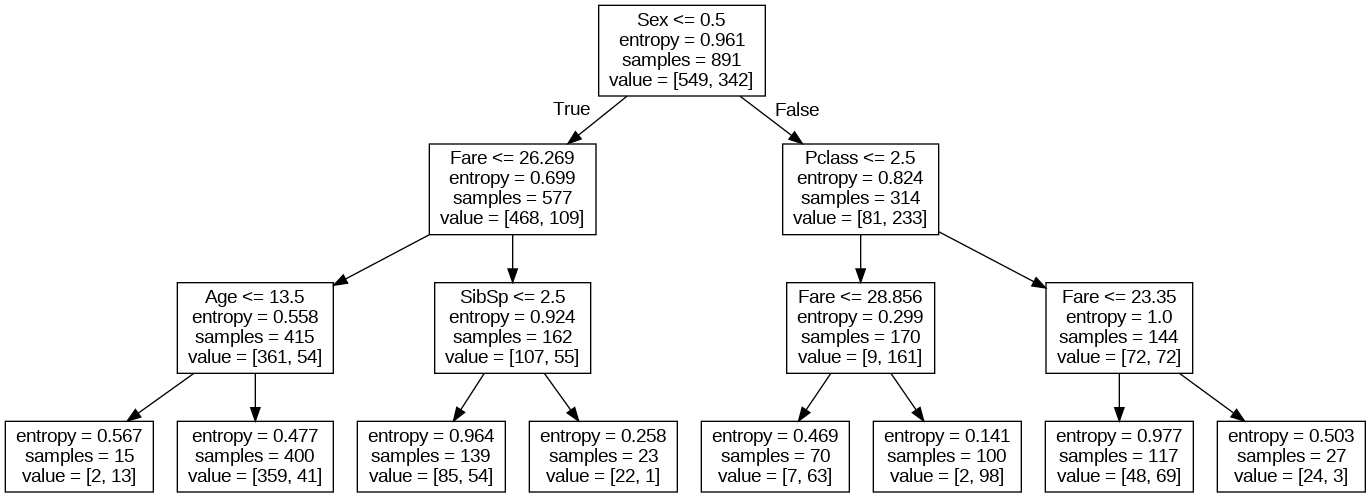

In [35]:
# d. display image
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image
#display the decison tree graphic
Image("/content/titanic.png")

e. Interpret the tree  


Question:  
What describes the group that had the most deaths by number? Which group had the most survivors?  

Answer:  
The group that had the most deaths by number are people who were male, paid a fare of less than 26.269, and had an age of less than or equal to 13.5.  

While the group that had the most survivors was females.

## Part 2: Apply the Decision Tree Model

### Step 1: Import and Prepare the Data

In [42]:
# a. import the data
testing = pd.read_csv('/content/titanic_test.csv')

In [43]:
# How many records are in the data set?

#Getting the number of rows in the csv file
numof_records = testing.shape[0]

#Printing the number of records
print("There are " + str(numof_records) + " records in the dataset.")

There are 418 records in the dataset.


In [40]:
# Which important variables are missing values and how many are missing?
missingVal = testing.isna().sum()

missingCol = missingVal[missingVal > 0]

print("Missing values:")
print(missingCol)

Missing values:
Age       86
Fare       1
Cabin    327
dtype: int64


In [44]:
# b. Use a lambda expression to replace the "male" and "female" values with 0 for male and 1 for female
testing["Sex"] = testing["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [55]:
# c. Replace the missing age values with the mean of the ages.
#code cell 17
#Use the fillna method of the testing dataframe column "Age"
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)
testing["Fare"].fillna(testing["Fare"].mean(), inplace=True)

In [52]:
# d. verify that the values have been replaced.
print(testing.info())
print(testing.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB
None
   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, 

### Step 2: Label the testing dataset

In [57]:
# a. create the array of input variables from the data set

#code cell 19
# Create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

In [58]:
# b. apply the model to the testing data set

#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object
target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels,'Name':testing['Name']})

#display the first few rows of the data set
print(testing.head())

   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [60]:
# c. evaluate the accuracy of the estimated labels

#code cell 21
# Import the numpy library as np
import numpy as np

# Load data for all passengers in the variable all_data
all_data = pd.read_csv("/content/titanic_all.csv")

# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels,all_data[['Name','Survived']],on=['Name'])

# Compute the accuracy as a ratio of matching observations to total observations. Store this in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))

# Print the result
print("Accuracy:",acc)

Accuracy: 0.7682619647355163


## Part 3: Evaluate the Decision Tree Model

### Step 1: Import the data

In [61]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("/content/titanic_all.csv", usecols = ['Survived','Pclass','Gender','Age','SibSp','Fare'])

#View info for the new dataframe
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB
None


Question:  
How many records are in the data set?  

Answer:  
There are 1308 records within the data set.

Question:  
Which important variables are missing values and how many are missing?

Answer:  
The "Age" variable is missing 263 values.

### Step 2: Prepare the data

In [62]:
# a. remove the "male" and "female" strings and replace them with 0 and 1 respectively.

#code cell 23
#Label the gender variable with 0 and 1
all_data['Gender'] = all_data['Gender'].replace({'male':0, 'female':1})

In [63]:
# c. replace the missing age values with the mean age of all members on the dataset

#code cell 24
#replace missing Age values with the mean age
mean_age = all_data['Age'].mean()
all_data['Age'].fillna(mean_age, inplace=True)

#display the first few rows of the modified dataset
print(all_data.head())


   Survived  Pclass  Gender      Age  SibSp      Fare
0         1       1       1  29.0000      0  211.3375
1         1       1       0   0.9167      1  151.5500
2         0       1       1   2.0000      1  151.5500
3         0       1       0  30.0000      1  151.5500
4         0       1       1  25.0000      1  151.5500


### Step 3: Create the input and output variables for the training and testing data

In [70]:
# a. designate the input variables and output variables and generate the arraus

#code cell 25
#Import train_test_split() from the sklearn.model_selection libary
from sklearn.model_selection import train_test_split

columns = ['Pclass', 'Gender', 'Age', 'SibSp', 'Fare']

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[columns].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [71]:
# b. train the model and fit it to the testing data

#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)


In [73]:
# c. compare models by scoring each

#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))
#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


## Conclusion

In this activity, we learned all about the decision tree classification. In order to apply what we learned, we use it on the Titanic Datasets. We conducted different tasks like preparing and cleaning the given csv files, managing the missing values, and creating a decision tree classifier.

Upon completing the tasks, the results was that the most important variable to survive was gender because the results showed that females had a higher chance of survival.

All-in-all, this activity was very difficult. However, I learned a lot about cleaning data, preparing data, and just in general more about the different libraries that we used. It showed me where and how I can use the different machine learning algorithms in order to analyze a given data.